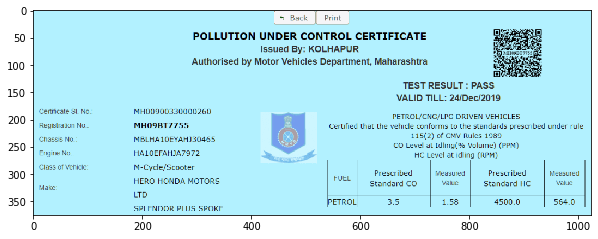

In [73]:
import pytesseract
import matplotlib.pyplot as plt
import cv2
pytesseract.pytesseract.tesseract_cmd = r"/usr/local/Cellar/tesseract/4.1.1/bin/tesseract"
image_path="/Users/sanjanasrinivasareddy/Desktop/vehicle_fitness/puc images/puc.jpg"
# load the original image
image = cv2.imread(image_path)
plt.figure(figsize=(10,10))
plt.imshow(image)
# convert the image to black and white for better OCR


In [74]:
ret,thresh1 = cv2.threshold(image,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

ew Sek bie |
ee
POLLUTION UNDER CONTROL CERTIFICATE Seas
Issued By: KOLHAPUR Rote
Authorised by Motor Vehicles Department, Maharashtra aie
ie sedaies
TEST RESULT : PASS
VALID TILL: 24/Dec/2019
Centiicate SI No ™MH00900330000260 PETROLICNG/LPG DRIVEN VEHICLES
Registration No MHO9BT7755 Certified that the vehicle conforms to the standards prescribed under rule
: 115(2) of CMY Rules 1989
rast MBLHALOEYATI30405 CO Level at Idling{% Volume) (PPM)
Engine No HALGEFAHIA7972 / ° HC Level at idling (RPM)
Sresongens MrCycle/Scooter suc. | Prescribed | ticasured | Prescribed | weasures
wane HERO HONDA MOTORS Standard CO value Standard HC value
uo
perro 3.5 | tse [4500.0 564.0
SPLENDOR PLUS SPOKE


In [75]:
resul = ['petrol','diesel']
import pandas as pd
import Levenshtein

def closest_result(word):
    df = pd.DataFrame({'result': ['petrol','diesel']})
    df['dist'] = df['result'].apply(lambda month: Levenshtein.distance(word, month))
    idxmin = df['dist'].idxmin()
    return [idxmin+1, df.loc[idxmin, 'dist']]

In [76]:
df = pd.DataFrame({'result': ['petrol','diesel']})

In [92]:
import regex as re
d={}
# i took the entire sequence originally but this is just an example
seq =text
my_list=re.findall('[A-z]{2}(?=.*\d)[a-zA-Z\d]{8,18}', seq)
my_list=[x for x in my_list if  any(c.isdigit() for c in x)]
# print(["certificate no","registration no","chassis no","engine no"])
# print(my_list)
d['certificate no']=my_list[0]
d['registration no']=my_list[1]
d['chassis no']=my_list[2]
d['engine no']=my_list[3]
my_list1=re.findall('PASS', seq)
if(len(my_list1)==0):
    result='FAIL'
else:
    result="PASS"
# print(result)
res = text.split()  
d['pollution test resut']=result 
# printing result  
# print ("\nThe words of string are") 
mini=99
red=0
cc=[]
l=len(res)
for i in res: 
#     print(res[i])
    cc=closest_result(i)
    if(cc[1]<mini):
        red=cc[0]
# print(resul[red-1])
seq =text
my_listt=re.findall('([1-9]|1[0-9]|2[0-9]|3[0-1]|0[0-9])(.|-|\/)([A-z]{3})(.|-|\/)(20[0-9][0-9])', seq)
# print(my_listt)
stri =  ''.join(my_listt[0]) 
d['validity date']=stri
# print(stri)

In [93]:
d

{'certificate no': 'MH00900330000260',
 'registration no': 'MHO9BT7755',
 'chassis no': 'MBLHALOEYATI30405',
 'engine no': 'HALGEFAHIA7972',
 'pollution test resut': 'PASS',
 'validity date': '24/Dec/2019'}

In [95]:
import pytesseract
import matplotlib.pyplot as plt
import cv2
pytesseract.pytesseract.tesseract_cmd = r"/usr/local/Cellar/tesseract/4.1.1/bin/tesseract"
image_path="/Users/sanjanasrinivasareddy/Desktop/vehicle_fitness/puc images/rc2.jpg"
# load the original image
image = cv2.imread(image_path)

# get co-ordinates to crop the image
# c = line_items_coordinates[1]

# cropping image img = image[y0:y1, x0:x1]
# img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

# plt.figure(figsize=(10,10))
# plt.imshow(image)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(image,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = (pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

pee, vo 7 Em,
eS “Andaman & Nicobar Administration, Transport Department @@
Certificate of Registration
salad ANO1J 8844 = 25/11/2014 24/11/2029
CFE savsera oa =
pS oes a
=| 6006878 =
ABDUL SALEEM MK
PETROL HAMZA
. SCHOOL LINE
DoRT BLAIR
AN ISLANDS s939247444-744103


In [96]:
import regex as re

# i took the entire sequence originally but this is just an example
seq =text
my_list=re.findall('([1-9]|1[0-9]|2[0-9]|3[0-1]|0[0-9])(.|-|\/)([1-9]|1[0-2]|0[0-9])(.|-|\/)(20[0-9][0-9])', seq)

In [101]:

d={}
d['manufacture date']=''.join(list(my_list[0]))
from datetime import date
today = date.today()
# dd/mm/YY
d1 = today.strftime("%d/%m/%Y")
# print("d1 =", d1)
d["Vehicle Age"] = int(d1[6:]) - int(d['manufacture date'][6:])

In [105]:
d.items()

dict_items([('manufacture date', '25/11/2014'), ('Vehicle Age', 6)])